<a href="https://colab.research.google.com/github/KaveeshBaddage/DataScienceImpl/blob/main/Generative_Adversarial_Network_(GAN)_for_MNIST_kaveesha%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torchvision.utils import save_image


import numpy as np
import matplotlib.pyplot as plt

Load MNIST Data set to Run Time



transform=ToTensor() <- converts data in the range 0-255 to 0-1.



In [ ]:
train_dataset = MNIST(
    root='data/',
    train=True,
    download=True,
    transform=ToTensor() # convert images in to tensors
    )  
print("train_dataset.data.size() ->",train_dataset.data.size())

# Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, 
    batch_size=64,
    num_workers=0
    )

test_dataset = MNIST(
    root='data/', 
    train=False, 
    transform=ToTensor()
    )
print("test_dataset_sizec ->",test_dataset.data.size())


test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, 
    batch_size=64,
    num_workers=0
    )

# # returns an iterator object for the given object.
# dataiter = iter(train_loader)
# # get Single object
# images, labels = dataiter.next()

# print("image size [0] ->",images.size(0))

# # provides a multidimensional array object,
# images = images.numpy()

# img = np.squeeze(images[1])

# fig = plt.figure(figsize = (3,3)) 
# ax = fig.add_subplot(111)
# ax.imshow(img, cmap='gray')

# # train_dataset[0] containd tensor with image properties
# # train_dataset[1] containd tensor with image label
# image, label = train_dataset[0]

# print("(train_dataset[0][0].size() ->",train_dataset[0][0].size())
# print("(train_dataset[0][1] ->",train_dataset[0][1])
# print("image size ->",image.shape)


# in_features = image.numel()
# print("in_features ->",in_features)


# out_classes = len(train_dataset.classes)
# print("out_classes ->",out_classes)

# torch.utils.data.DataLoader Parameters

dataset (Dataset) – dataset from which to load the data.

batch_size (int, optional) – how many samples per batch to load (default: 1).

num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process.


----------

The iter() function creates an object which can be iterated one element at a time.



In [3]:
# defining Discriminator class

import torch.nn.functional as F

class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        # access methods from parent class nn.Module
        super(Discriminator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim*4)
        self.fc2 = nn.Linear(hidden_dim*4, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)
        
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3) # randomly zeroes some of the elements of the input tensor with probability 0.3 using samples
        
        
    def forward(self, x):
        # flatten image
        x = x.view(-1, 28*28) #  reshape the tensor to 28*28 tensor
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2) This function returns x if it receives any positive input, but for any negative value of x, it returns a really small value which is 0.02 times x
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer
        out = self.fc4(x)

        return out

In [4]:
# defining generator class 1

class Generator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim*4)
        
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim*4, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3) #  randomly zeroes some of the elements of the input tensor with probability of 0.3 using samples from a Bernoulli distribution.

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with tanh applied
        out = F.tanh(self.fc4(x)) # outputs in the range (-1, 1)
        #out = nn.Tanh(self.fc4(x))

        return out

In [6]:
# defining generator class 2

class generator2(nn.Module):
    
    def __init__(self, inp, out):
        
        super(generator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(in_features,100),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(100,500),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(500,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,out_classes)
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x

Reference - https://deeplizard.com/learn/video/bH9Nkg7G8S0

nn.Sequential - A sequential container. Modules will be added to it in the order they are passed in the constructor
The Sequential class allows us to build PyTorch neural networks on-the-fly without having to build an explicit class

---------

Rectified Linear Activation Function(ReLU) do

if(input > 0){
	return input 
  }
else{
	return 0
}

In [5]:

# Discriminator hyperparams

# Size of input image to discriminator (28*28)
input_size = 784
# Size of discriminator output (real or fake)
d_output_size = 1
# Size of last hidden layer in the discriminator
d_hidden_size = 32

# Generator hyperparams

# Size of latent vector to give to generator
z_size = 100
# Size of discriminator output (generated image)
g_output_size = 784
# Size of first hidden layer in the generator
g_hidden_size = 32


D = Discriminator(input_size, d_hidden_size, d_output_size)
G = Generator(z_size, g_hidden_size, g_output_size)

# check that they are as you expect
print(D)
print()
print(G)

Discriminator(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Generator(
  (fc1): Linear(in_features=100, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [6]:
# Calculate losses
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing to help the discriminator generalize better, 
    if smooth:
        # smooth, real labels = 0.9 
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
        
    # numerically stable loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [7]:

import torch.optim as optim

# Optimizers Learning Rate
lr = 0.002

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr)
g_optimizer = optim.Adam(G.parameters(), lr)

In [25]:
print(len(train_loader))
example = next(iter(train_loader))[0]
print(example.size())
print(example.size(0))
print(example[0].size())
#print(example[0])

938
torch.Size([64, 1, 28, 28])
64
torch.Size([1, 28, 28])


*    train_loader contains 938 batches and each batch has 64 tensors. Because we define batch_size as 64 when storing dataset in to the DataLoader.
    *    938 X 64 = 60032  // which equals to train_dataset:60000 
*    Each tensor in a batch represent single image. 
*    Image representing tensor  has following format.
    *    `[[28 real numbers][28 real numbers]]`

In [ ]:
import pickle as pkl

# training hyperparams
num_epochs = 200

samples = []
losses = []

print_every = 400

sample_size=16
z_size = 100
fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
fixed_z = torch.from_numpy(fixed_z).float()
print(fixed_z.size())

# train the network
D.train()
G.train()


for epoch in range(num_epochs):
    
    for batch_i, (real_images, _) in enumerate(train_loader):
                
        batch_size = real_images.size(0)
        
        ## Important rescaling step ## 
        real_images = real_images*2 - 1  
        # rescale input images from [0,1) to [-1, 1)
        
        # ============================================
        #            TRAIN THE DISCRIMINATOR
        # ============================================
        
        # clear out the gradients of all Variables since no need to keep the gradient calculation result of the previous batch
        d_optimizer.zero_grad()
        
        # 1. Train with real images

        # Compute the discriminator losses on real images by getting data from train_loader
        # smooth the real labels
        D_real = D(real_images)
        d_real_loss = real_loss(D_real, smooth=True) 
        
        # 2. Train with fake images
        
        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images        
        D_fake = D(fake_images)
        d_fake_loss = fake_loss(D_fake)
        
        # add up loss and perform backprop
        d_loss = d_real_loss + d_fake_loss
        # accumulates the gradient (by addition) for each parameter.
        d_loss.backward()
        # performs a parameter update based on the current gradient (stored in .grad attribute of a parameter)
        d_optimizer.step()
        
        
        # =========================================
        #            TRAIN THE GENERATOR
        # =========================================
        
        g_optimizer.zero_grad()
        
        # 1. Train with fake images and flipped labels
        
        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images 
        # using flipped labels!
        D_fake = D(fake_images)
        g_loss = real_loss(D_fake) # use real loss to flip labels
        
        # perform backprop
        g_loss.backward()
        g_optimizer.step()

        # Print some loss stats
        if batch_i % print_every == 0:
            # print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                    epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    
    ## AFTER EACH EPOCH##
    # append discriminator loss and generator loss
    losses.append((d_loss.item(), g_loss.item()))
    
    # generate and save sample, fake images
    G.eval() # eval mode for generating samples
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train() # back to train mode


# Save training generator samples
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

# Save the Generator
with open('G.pkl', 'wb') as f:
    pkl.dump(G, f)

# Save the Discriminator
with open('D.pkl', 'wb') as f:
    pkl.dump(D, f)



Enumerate() method adds a counter to an iterable and returns it in a form of enumerate objec

In [27]:
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

In [29]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')

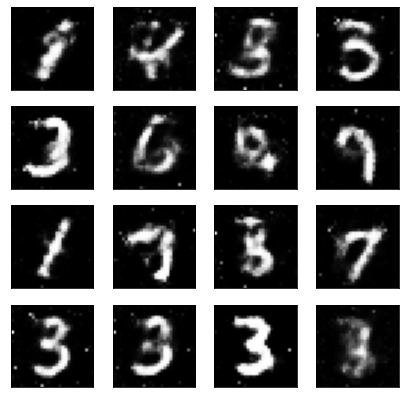

In [30]:
view_samples(-1, samples)

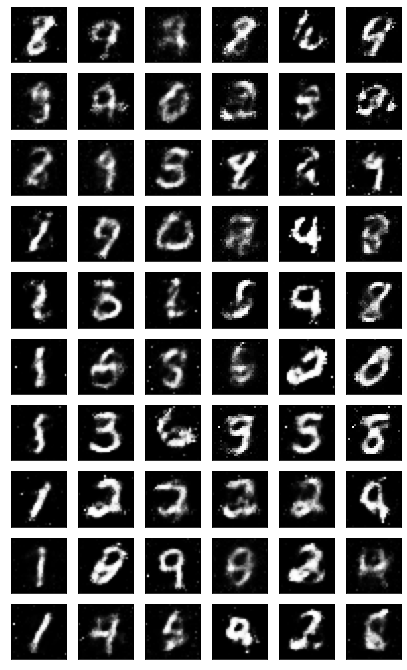

In [31]:
rows = 10 # split epochs into 10, so 100/10 = every 10 epochs
cols = 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        img = img.detach()
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

In [ ]:
# from torch.autograd import Variable
# #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
# bs = 100 #Batch Size
# z_dim = 100 #Z dimensions
# z = Variable(torch.randn(bs, z_dim).to(device))

from torchvision.utils import save_image


#create 100 latent vectors
sample_size=100
z = np.random.uniform(-1, 1, size=(sample_size, z_size))
z = torch.from_numpy(z).float()

print(z[0].size())

G.eval() # eval mode

root = '/content'


for i, image_tensor in enumerate(z):
    image_tensor = image_tensor.detach()
    print(i,image_tensor)

    # save latent vector related to the image
    f = open(root + r'/images/%d.txt' %i,'a')
    f.write(np.array2string(image_tensor.numpy(), separator=','))
    f.close()

    # create image using latent vector
    G.eval()
    rand_image = G(image_tensor) 
    #view_samples(0, [rand_images])
    #print(rand_image.size())

    # save image
    rand_image = rand_image.view(-1, 28) # convert [784] tensor in to [28,28] tensor to create image
    print(rand_image.size())
    save_image(rand_image, root + r'/images/%d.png' %i, normalize = True)


#create a zip file contains generated image files and Latent samples
import shutil
shutil.make_archive('images', 'zip', 'images')

In [ ]:
# from torch.autograd import Variable
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# bs = 100 #Batch Size
# z_dim = 100 #Z dimensions
# z = Variable(torch.randn(bs, z_dim).to(device))


# for i, z in enumerate(z):
#     print(i,z.size())


In [33]:
from torchvision.utils import save_image
import torch
import torchvision
import numpy as np

rand_tensor= torch.rand(64, 3,28,28) 

root = '/content'


for i, image in enumerate(rand_tensor[0]):
    image = image.detach()

    # save latent vector related to the image
    f = open(root + r'/images/%d.txt' %i,'a')
    f.write(np.array2string(rand_tensor.numpy(), separator=','))
    f.close()

    # save image
    print(image.size())
    image = image.view(-1, 28*28)
    print(image.size())
    save_image(image, root + r'/images/%d.png' %i, normalize = True)


torch.Size([28, 28])
torch.Size([1, 784])
torch.Size([28, 28])
torch.Size([1, 784])
torch.Size([28, 28])
torch.Size([1, 784])


In [ ]:
sample_size=3
z = np.random.uniform(-1, 1, size=(sample_size, z_size))
z = torch.from_numpy(z).float()

print(z[0].size())

for i, image_tensor in enumerate(z):
    image_tensor = image_tensor.detach()
    print(i,image_tensor)
